# Complejidad de fuerza bruta

Vamos a ver que la complejidad de fuerza bruta es $\Theta(2^n)$.

Para eso necesitamos:
1. Generar instancias aleatorias para distintos $n$
2. Medir el tiempo ed ejecución de fuera bruta
3. Comprar los resultados con una función $f(x) = 2^n$

In [2]:
import numpy as np

!mkdir ../instancias
!mkdir ../instancias/complejidadfb

ns = np.arange(1, 26)
k = 100
_R = (500, 1000)
_w = (1, 100)
_r = (800, 1000)

for i in ns:
        for j in range(k):
            R = np.random.randint((_R[1] - _R[0])) + _R[0]
            w = np.random.randint((_w[1] - _w[0]), size = i) + _w[0]
            r = np.random.randint((_r[1] - _r[0]), size = i) + _r[0]
            f = open("../instancias/complejidadfb/{}_{}.in".format(i, j), "x")
            f.write("{} {}\n".format(i, R))
            for l in range(i-1):
                f.write("{} {}\n".format(w[l], r[l]))
            f.write("{} {}".format(w[i-1], r[i-1]))
            f.close()

mkdir: ../instancias: File exists
mkdir: ../instancias/complejidadfb: File exists


Ya tenemos 100 instancias aleatorias para cada $n$ de 1 a 25, ejecutemos!

In [6]:
import time
import os

tiempos = [] # tiempos de ejecucion de fb

for i in ns:
    tiempo = 0 # acumuladores de tiempos de ejecucion

    for j in range(k):
        start = time.time()
        os.system("./../algo3-tp1 ./../instancias/complejidadfb/{}_{}.in 1".format(i, j))
        tiempo += time.time() - start
        
    tiempos.append(tiempo / k)

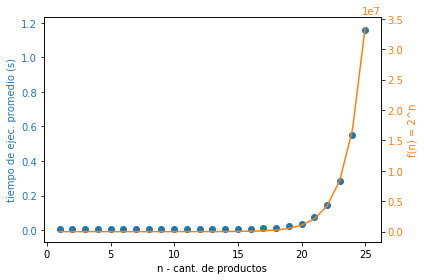

In [26]:
import matplotlib.pyplot as plt

orden = [2**i for i in ns]

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('n - cant. de productos')
ax1.set_ylabel('tiempo de ejec. promedio (s)', color=color)
ax1.scatter(ns, tiempos, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
ax2.set_ylabel('f(n) = 2^n', color=color)  # we already handled the x-label with ax1
ax2.plot(ns, orden, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Genial! Podemos ver claramente como la complejidad del problema es $\Theta(2^n)$. Veamos cual es la correlación entre estas dos funciones calculando el coeficiente de Pearson, que nos permite calcular la varianza de dos meustras sin importar su escala. 

In [28]:
from scipy import stats

stats.pearsonr(tiempos, orden)

(0.9996976820022996, 1.5955257508843527e-38)

Si r = 1, existe una correlación positiva perfecta. El índice indica una dependencia total entre las dos variables denominada relación directa: cuando una de ellas aumenta, la otra también lo hace en proporción constante.